In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
# Configuração geral de estilo
sns.set_style("whitegrid")
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
})


In [2]:
# Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
# Pré-processamento dos dados
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalização
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape para 4D
x_test = x_test.reshape(-1, 28, 28, 1)

In [4]:
# Construção do modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\julsoare\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Treinamento do modelo
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9088 - loss: 0.3015 - val_accuracy: 0.9816 - val_loss: 0.0562
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9845 - loss: 0.0514 - val_accuracy: 0.9848 - val_loss: 0.0431
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9904 - loss: 0.0306 - val_accuracy: 0.9860 - val_loss: 0.0443
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9943 - loss: 0.0200 - val_accuracy: 0.9864 - val_loss: 0.0428
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9962 - loss: 0.0127 - val_accuracy: 0.9883 - val_loss: 0.0430


In [7]:
# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Teste de acurácia: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0586
Teste de acurácia: 0.9883


In [8]:
# Predições
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [9]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

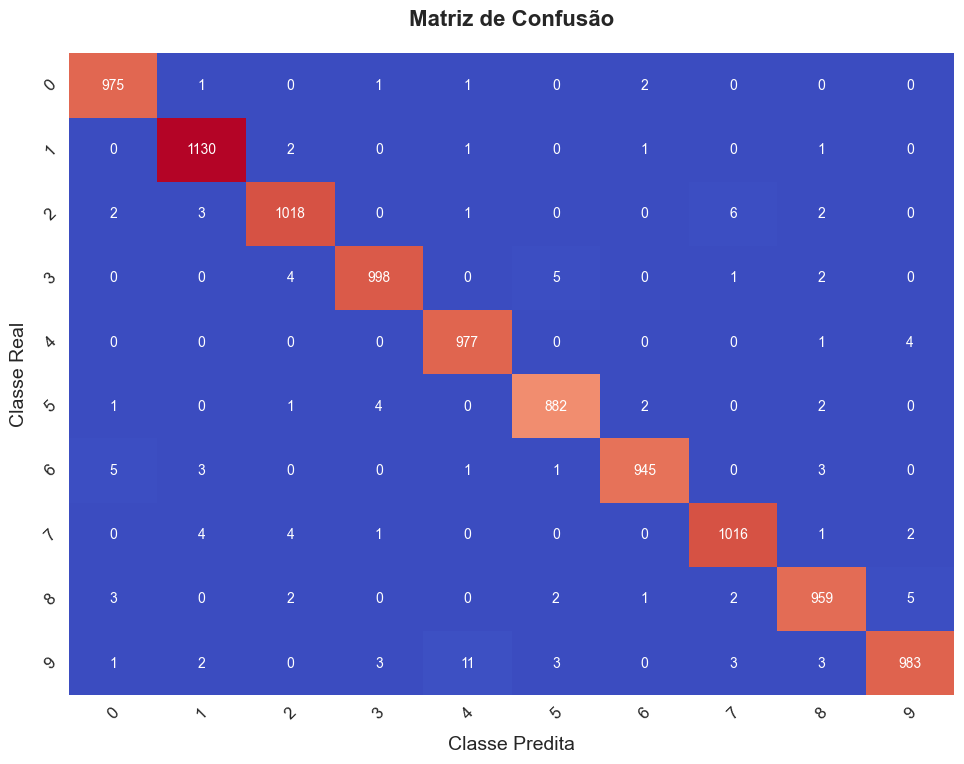

In [14]:
# Visualizar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False, xticklabels=range(10), yticklabels=range(10))
plt.title("Matriz de Confusão", pad=20, weight='bold')
plt.xlabel("Classe Predita", labelpad=10)
plt.ylabel("Classe Real", labelpad=10)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout(pad=2)
plt.show()

In [11]:
# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



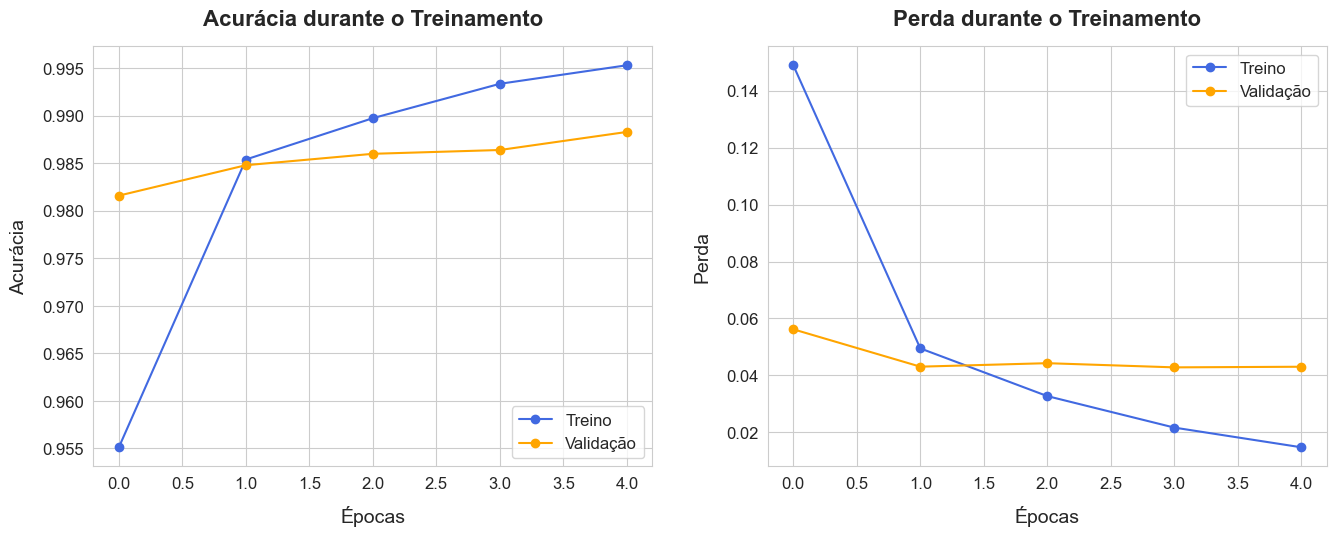

In [15]:
# Visualizar métricas de treinamento
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(14, 6))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Treino', color='royalblue', marker='o')
plt.plot(history_df['val_accuracy'], label='Validação', color='orange', marker='o')
plt.title('Acurácia durante o Treinamento', pad=15, weight='bold')
plt.xlabel('Épocas', labelpad=10)
plt.ylabel('Acurácia', labelpad=10)
plt.legend(loc='lower right', frameon=True, fancybox=True)
plt.grid(True)

# Perda
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Treino', color='royalblue', marker='o')
plt.plot(history_df['val_loss'], label='Validação', color='orange', marker='o')
plt.title('Perda durante o Treinamento', pad=15, weight='bold')
plt.xlabel('Épocas', labelpad=10)
plt.ylabel('Perda', labelpad=10)
plt.legend(loc='upper right', frameon=True, fancybox=True)
plt.grid(True)

plt.tight_layout(pad=3)
plt.show()